## 1. Download Wikipedia API to access and parse data from Wikipedia

In [94]:
!pip install wikipedia

## 2. Download pandasql library to run SQL queries on pandas dataframes

In [95]:
!pip install pandasql

## 3. Import necessary libraries

In [96]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import wikipedia as wiki
import pandasql as ps
import os
import subprocess
import stat
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

## 4. Use key words in the search function to find the wikipedia page that contains the necessary data

In [97]:
sports = wiki.search('major sports')
print(sports)

['Major professional sports leagues in the United States and Canada', 'Sports in the United States', 'U.S. cities with teams from four major league sports', 'Major professional sports teams of the United States and Canada', 'List of American and Canadian cities by number of major professional sports franchises', 'Major (disambiguation)', 'Multiple major sports championship seasons', 'Sports in Canada', 'List of North American cities by number of major sports championships', 'Khel Ratna Award']


In [98]:
pro_teams = wiki.page('Major professional sports teams of the United States and Canada')
print(pro_teams)

<WikipediaPage 'Major professional sports teams of the United States and Canada'>


In [99]:
content = pro_teams.content
print(content)

This article is a list of teams that play in one of the six major sports leagues in the United States and Canada: the Canadian Football League (CFL), Major League Baseball (MLB), Major League Soccer (MLS), the National Basketball Association (NBA), the National Football League (NFL) and the National Hockey League (NHL). 
Est. represents the first year the team played in its current media market. For brevity, only the most recent names for teams that have had multiple nicknames in their current media market are listed. Future expansion teams whose inaugural seasons are confirmed are also included in this list.


== Teams ==


== See also ==
Major professional sports leagues in the United States and Canada
List of professional sports leagues
List of defunct sports leagues
List of American and Canadian cities by number of major professional sports franchises
List of professional sports teams in the United States and Canada
List of top level minor league sports teams in the United States b

In [100]:
url = pro_teams.url
print(url)
print(pro_teams.title)

https://en.wikipedia.org/wiki/Major_professional_sports_teams_of_the_United_States_and_Canada
Major professional sports teams of the United States and Canada


## 5. Scrape data from wikipedia page

In [101]:
table_class="wikitable sortable jquery-tablesorter"
response=requests.get(url)
print(response.status_code)
soup = BeautifulSoup(response.text, 'html.parser')
parse = soup.find('table', {'class':"wikitable"})

200


## 6. Convert scraped data to Pandas dataframe

In [102]:
df = pd.read_html(str(parse))
df = pd.DataFrame(df[0])
print(df.head())

                   Team               Venue        City State/Province League  \
0         Anaheim Ducks        Honda Center     Anaheim     California    NHL   
1     Arizona Cardinals  State Farm Stadium    Glendale        Arizona    NFL   
2       Arizona Coyotes    Gila River Arena    Glendale        Arizona    NHL   
3  Arizona Diamondbacks         Chase Field     Phoenix        Arizona    MLB   
4        Atlanta Braves         Truist Park  Cumberland        Georgia    MLB   

   Est.                                    Franchise notes  Ref  
0  1993                                                NaN  [1]  
1  1988  Previously the Chicago Cardinals (1920–1959) a...  NaN  
2  1996          Previously the Winnipeg Jets (1972–1996).  [1]  
3  1998                                                NaN  NaN  
4  1966  Previously the Boston Braves (1871–1952) and M...  NaN  


In [103]:
data = df.drop(['Franchise notes', 'Ref'], axis=1)
print(data.head())

                   Team               Venue        City State/Province League  \
0         Anaheim Ducks        Honda Center     Anaheim     California    NHL   
1     Arizona Cardinals  State Farm Stadium    Glendale        Arizona    NFL   
2       Arizona Coyotes    Gila River Arena    Glendale        Arizona    NHL   
3  Arizona Diamondbacks         Chase Field     Phoenix        Arizona    MLB   
4        Atlanta Braves         Truist Park  Cumberland        Georgia    MLB   

   Est.  
0  1993  
1  1988  
2  1996  
3  1998  
4  1966  


## 7. Convert dataframe to a csv file

In [104]:
data.to_csv("Pro_Sports_Teams.csv")

## 8. Perform exploratory data analysis on the dataset

In [105]:
data.isnull().sum() 

Team              0
Venue             0
City              0
State/Province    0
League            0
Est.              0
dtype: int64

In [106]:
data.sort_values(by=['Est.', 'Team'])

,Team,Venue,City,State/Province,League,Est.
27,Chicago Cubs,Wrigley Field,Chicago,Illinois,MLB,1870
148,Toronto Argonauts,BMO Field,Toronto,Ontario,CFL,1873
113,Ottawa Redblacks,TD Place Stadium,Ottawa,Ontario,CFL,1876/2002/2014
31,Cincinnati Reds,Great American Ball Park,Cincinnati,Ohio,MLB,1882
122,Pittsburgh Pirates,PNC Park,Pittsburgh,Pennsylvania,MLB,1882
...,...,...,...,...,...,...
8,Austin FC,Q2 Stadium,Austin,Texas,MLS,2021
139,Seattle Kraken,Climate Pledge Arena,Seattle,Washington,NHL,2021
23,Charlotte FC,Bank of America Stadium,Charlotte,North Carolina,MLS,2022
138,St. Louis City SC,St. Louis MLS Stadium,St. Louis,Missouri,MLS,2023


In [107]:
data.sort_values(by=['League','Team'])

,Team,Venue,City,State/Province,League,Est.
11,BC Lions,BC Place,Vancouver,British Columbia,CFL,1954
19,Calgary Stampeders,McMahon Stadium,Calgary,Alberta,CFL,1945
52,Edmonton Elks,Commonwealth Stadium,Edmonton,Alberta,CFL,1949
57,Hamilton Tiger-Cats,Tim Hortons Field,Hamilton,Ontario,CFL,1950
90,Montreal Alouettes,Percival Molson Memorial Stadium,Montreal,Quebec,CFL,1946/1996
...,...,...,...,...,...,...
151,Toronto Maple Leafs,Scotiabank Arena,Toronto,Ontario,NHL,1923
154,Vancouver Canucks,Rogers Arena,Vancouver,British Columbia,NHL,1970
156,Vegas Golden Knights,T-Mobile Arena,Paradise,Nevada,NHL,2017
157,Washington Capitals,Capital One Arena,Washington,District of Columbia,NHL,1974


In [108]:
data.sort_values(by=['Venue','Team'])

,Team,Venue,City,State/Province,League,Est.
129,San Antonio Spurs,AT&T Center,San Antonio,Texas,NBA,1973
42,Dallas Cowboys,AT&T Stadium,Arlington,Texas,NFL,1960
69,Las Vegas Raiders,Allegiant Stadium,Paradise,Nevada,NFL,2020
87,Minnesota United FC,Allianz Field,St. Paul,Minnesota,MLS,2017
144,Tampa Bay Lightning,Amalie Arena,Tampa,Florida,NHL,1992
...,...,...,...,...,...,...
27,Chicago Cubs,Wrigley Field,Chicago,Illinois,MLB,1870
89,Minnesota Wild,Xcel Energy Center,St. Paul,Minnesota,NHL,2000
100,New York City FC,Yankee Stadium,New York City,New York,MLS,2015
108,New York Yankees,Yankee Stadium,New York City,New York,MLB,1903


In [109]:
data.sort_values(by=['State/Province','Team'])

,Team,Venue,City,State/Province,League,Est.
18,Calgary Flames,Scotiabank Saddledome,Calgary,Alberta,NHL,1980
19,Calgary Stampeders,McMahon Stadium,Calgary,Alberta,CFL,1945
52,Edmonton Elks,Commonwealth Stadium,Edmonton,Alberta,CFL,1949
53,Edmonton Oilers,Rogers Place,Edmonton,Alberta,NHL,1972
1,Arizona Cardinals,State Farm Stadium,Glendale,Arizona,NFL,1988
...,...,...,...,...,...,...
141,Seattle Seahawks,Lumen Field,Seattle,Washington,NFL,1976
142,Seattle Sounders FC,Lumen Field,Seattle,Washington,MLS,2009
56,Green Bay Packers,Lambeau Field,Green Bay,Wisconsin,NFL,1921
83,Milwaukee Brewers,American Family Field,Milwaukee,Wisconsin,MLB,1970


### 9. Use PandaSQL to run SQL queries on the data

In [110]:
Cali_teams = """SELECT * FROM data where "State/Province" = 'California' ORDER BY City, Team"""
ps.sqldf(Cali_teams)

,Team,Venue,City,State/Province,League,Est.
0,Anaheim Ducks,Honda Center,Anaheim,California,NHL,1993
1,Los Angeles Angels,Angel Stadium,Anaheim,California,MLB,1961
2,LA Galaxy,Dignity Health Sports Park,Carson,California,MLS,1996
3,Los Angeles Chargers,SoFi Stadium,Inglewood,California,NFL,2017
4,Los Angeles Rams,SoFi Stadium,Inglewood,California,NFL,2016
5,Los Angeles Clippers,Crypto.com Arena,Los Angeles,California,NBA,1984
6,Los Angeles Dodgers,Dodger Stadium,Los Angeles,California,MLB,1958
7,Los Angeles FC,Banc of California Stadium,Los Angeles,California,MLS,2018
8,Los Angeles Kings,Crypto.com Arena,Los Angeles,California,NHL,1967
9,Los Angeles Lakers,Crypto.com Arena,Los Angeles,California,NBA,1960


In [111]:
NBA_teams = data[data["League"] == "NBA"]
NBA_teams

,Team,Venue,City,State/Province,League,Est.
6,Atlanta Hawks,State Farm Arena,Atlanta,Georgia,NBA,1968
13,Boston Celtics,TD Garden,Boston,Massachusetts,NBA,1946
15,Brooklyn Nets,Barclays Center,New York City,New York,NBA,1967
22,Charlotte Hornets,Spectrum Center,Charlotte,North Carolina,NBA,2004
26,Chicago Bulls,United Center,Chicago,Illinois,NBA,1966
34,Cleveland Cavaliers,Rocket Mortgage FieldHouse,Cleveland,Ohio,NBA,1970
43,Dallas Mavericks,American Airlines Center,Dallas,Texas,NBA,1980
47,Denver Nuggets,Ball Arena,Denver,Colorado,NBA,1967
49,Detroit Pistons,Little Caesars Arena,Detroit,Michigan,NBA,1957
55,Golden State Warriors,Chase Center,San Francisco,California,NBA,1962


In [112]:
NFL_teams = data[data["League"] == "NFL"]
NFL_teams

,Team,Venue,City,State/Province,League,Est.
1,Arizona Cardinals,State Farm Stadium,Glendale,Arizona,NFL,1988
5,Atlanta Falcons,Mercedes-Benz Stadium,Atlanta,Georgia,NFL,1966
10,Baltimore Ravens,M&T Bank Stadium,Baltimore,Maryland,NFL,1996
16,Buffalo Bills,Highmark Stadium,Orchard Park,New York,NFL,1960
21,Carolina Panthers,Bank of America Stadium,Charlotte,North Carolina,NFL,1995[n 2]
24,Chicago Bears,Soldier Field,Chicago,Illinois,NFL,1921
30,Cincinnati Bengals,Paul Brown Stadium,Cincinnati,Ohio,NFL,1968
33,Cleveland Browns,FirstEnergy Stadium,Cleveland,Ohio,NFL,1946
42,Dallas Cowboys,AT&T Stadium,Arlington,Texas,NFL,1960
46,Denver Broncos,Empower Field at Mile High,Denver,Colorado,NFL,1960


In [113]:
MLB_teams = data[data["League"] == "MLB"]
MLB_teams

,Team,Venue,City,State/Province,League,Est.
3,Arizona Diamondbacks,Chase Field,Phoenix,Arizona,MLB,1998
4,Atlanta Braves,Truist Park,Cumberland,Georgia,MLB,1966
9,Baltimore Orioles,Oriole Park at Camden Yards,Baltimore,Maryland,MLB,1954
14,Boston Red Sox,Fenway Park,Boston,Massachusetts,MLB,1901
27,Chicago Cubs,Wrigley Field,Chicago,Illinois,MLB,1870
29,Chicago White Sox,Guaranteed Rate Field,Chicago,Illinois,MLB,1901
31,Cincinnati Reds,Great American Ball Park,Cincinnati,Ohio,MLB,1882
35,Cleveland Guardians,Progressive Field,Cleveland,Ohio,MLB,1901
38,Colorado Rockies,Coors Field,Denver,Colorado,MLB,1993
51,Detroit Tigers,Comerica Park,Detroit,Michigan,MLB,1901


In [114]:
NHL_teams = data[data["League"] == "NHL"]
NHL_teams

,Team,Venue,City,State/Province,League,Est.
0,Anaheim Ducks,Honda Center,Anaheim,California,NHL,1993
2,Arizona Coyotes,Gila River Arena,Glendale,Arizona,NHL,1996
12,Boston Bruins,TD Garden,Boston,Massachusetts,NHL,1924
17,Buffalo Sabres,KeyBank Center,Buffalo,New York,NHL,1970
18,Calgary Flames,Scotiabank Saddledome,Calgary,Alberta,NHL,1980
20,Carolina Hurricanes,PNC Arena,Raleigh,North Carolina,NHL,1997[n 1]
25,Chicago Blackhawks,United Center,Chicago,Illinois,NHL,1926
36,Colorado Avalanche,Ball Arena,Denver,Colorado,NHL,1995
39,Columbus Blue Jackets,Nationwide Arena,Columbus,Ohio,NHL,2000
44,Dallas Stars,American Airlines Center,Dallas,Texas,NHL,1993


In [115]:
MLS_teams = data[data["League"] == "MLS"]
MLS_teams

,Team,Venue,City,State/Province,League,Est.
7,Atlanta United FC,Mercedes-Benz Stadium,Atlanta,Georgia,MLS,2017
8,Austin FC,Q2 Stadium,Austin,Texas,MLS,2021
23,Charlotte FC,Bank of America Stadium,Charlotte,North Carolina,MLS,2022
28,Chicago Fire FC,Soldier Field,Chicago,Illinois,MLS,1997
32,FC Cincinnati,TQL Stadium,Cincinnati,Ohio,MLS,2019
37,Colorado Rapids,Dick's Sporting Goods Park,Commerce City,Colorado,MLS,1996
40,Columbus Crew SC,Lower.com Field,Columbus,Ohio,MLS,1996
41,FC Dallas,Toyota Stadium,Frisco,Texas,MLS,1996
45,D.C. United,Audi Field,Washington,District of Columbia,MLS,1996
59,Houston Dynamo FC,BBVA Stadium,Houston,Texas,MLS,2006


In [116]:
CFL_teams = data[data["League"] == "CFL"]
CFL_teams

,Team,Venue,City,State/Province,League,Est.
11,BC Lions,BC Place,Vancouver,British Columbia,CFL,1954
19,Calgary Stampeders,McMahon Stadium,Calgary,Alberta,CFL,1945
52,Edmonton Elks,Commonwealth Stadium,Edmonton,Alberta,CFL,1949
57,Hamilton Tiger-Cats,Tim Hortons Field,Hamilton,Ontario,CFL,1950
90,Montreal Alouettes,Percival Molson Memorial Stadium,Montreal,Quebec,CFL,1946/1996
113,Ottawa Redblacks,TD Place Stadium,Ottawa,Ontario,CFL,1876/2002/2014
135,Saskatchewan Roughriders,Mosaic Stadium,Regina,Saskatchewan,CFL,1910
148,Toronto Argonauts,BMO Field,Toronto,Ontario,CFL,1873
161,Winnipeg Blue Bombers,IG Field,Winnipeg,Manitoba,CFL,1930


In [117]:
Most_By_City = """SELECT City, COUNT(*) as Number_Of_Teams FROM data GROUP BY City ORDER BY COUNT(*) DESC"""
ps.sqldf(Most_By_City)

,City,Number_Of_Teams
0,New York City,6
1,Chicago,6
2,Toronto,5
3,Los Angeles,5
4,Washington,4
...,...,...
72,Commerce City,1
73,Chester,1
74,Carson,1
75,Buffalo,1


In [118]:
Most_By_State = """SELECT "State/Province", COUNT(*) as Number_Of_Teams FROM data GROUP BY "State/Province" ORDER BY COUNT(*) DESC"""
ps.sqldf(Most_By_State)

,State/Province,Number_Of_Teams
0,California,19
1,Texas,11
2,Florida,11
3,New York,9
4,Pennsylvania,8
5,Ontario,8
6,Ohio,8
7,Illinois,6
8,Missouri,5
9,Minnesota,5


In [119]:
tps = data['State/Province'].value_counts()
columns = ['State/Province', 'Teams']
tps.to_csv('Teams_Per_State.csv', header = None)
tps = pd.read_csv('Teams_Per_State.csv', names=columns)
tps.to_csv('Teams_Per_State.csv')
tps

,State/Province,Teams
0,California,19
1,Florida,11
2,Texas,11
3,New York,9
4,Ontario,8
5,Ohio,8
6,Pennsylvania,8
7,Illinois,6
8,Missouri,5
9,Minnesota,5


In [120]:
tpl = data['League'].value_counts()
columns = ['League', 'Teams']
tpl.to_csv('Teams_Per_League.csv', header = None)
tpl = pd.read_csv('Teams_Per_League.csv', names=columns)
tpl.to_csv('Teams_Per_League.csv')
tpl

,League,Teams
0,NHL,32
1,NFL,32
2,MLB,30
3,NBA,30
4,MLS,30
5,CFL,9


## 10. Visualize the data

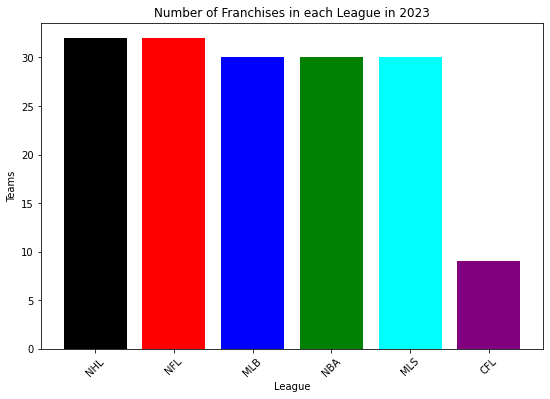

In [121]:
plt.figure(figsize=(9, 6))
plt.bar(x=tpl['League'],
        height=tpl['Teams'],
        color=['black', 'red', 'blue', 'green', 'cyan', 'purple'],
        label='Teams')

plt.xticks(rotation=45)
plt.title('Number of Franchises in each League in 2023')
plt.xlabel('League')
plt.ylabel('Teams');
plt.show()

In [122]:
venues = """SELECT Venue FROM data ORDER BY Venue"""
ps.sqldf(venues)

,Venue
0,AT&T Center
1,AT&T Stadium
2,Allegiant Stadium
3,Allianz Field
4,Amalie Arena
...,...
158,Wrigley Field
159,Xcel Energy Center
160,Yankee Stadium
161,Yankee Stadium


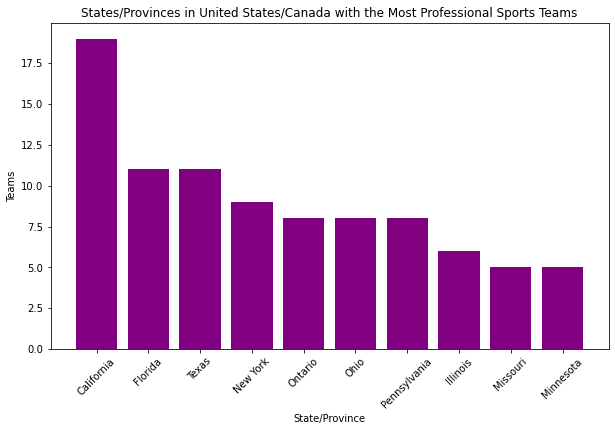

In [93]:
top_ten_states = tps.head(10)
plt.figure(figsize=(10, 6))

plt.bar(x=top_ten_states['State/Province'],
        height=top_ten_states['Teams'],
        color = 'purple')

plt.xticks(rotation=45)
plt.title('States/Provinces in United States/Canada with the Most Professional Sports Teams')
plt.xlabel('State/Province')
plt.ylabel('Teams');
plt.show()